To open notebook in Colab please click below:

<a href="https://colab.research.google.com/github/bwolfson2/foster_2020/blob/master/Homeworks/HW%201.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>'

If opening in colab run this cell

!git clone https://github.com/bwolfson2/foster_2021

%cd foster_2021/Homeworks/

**I forked it from github and keep track of upstream**


# Homework 1

## Part 2: Graduate admissions case study

You've been hired by Hudson University as a data analyst for the Graduate Admissions Department. Since the admission process is long and tedious, it often results in a bottleneck for other subsequent tasks, such as planning the necessary resources to accommodate the admitted students (e.g. housing, classes, etc). You have been asked to build a model to predict which students will be admitted using the following historical data: 

1. Serial No. (serves as unique identifier)
2. GRE Scores (out of 340) 
3. TOEFL Scores (out of 120) 
4. University Rating (out of 5).
5. Statement of Purpose Strength (out of 5)
6. Letter of Recommendation Strength (out of 5) 
7. Undergraduate GPA (out of 10) 
8. Research Experience (either 0 or 1) 
9. Chance of Admit (ranging from 0 to 1)

The chances of admit for the applicants in your data were assessed by an expert. Given that this list of application attributes would be available early in the admission process for future applications (except for Chance of Admit), a model predicting chances of admit would allow planning tasks to start earlier.

In [1]:
# Some libraries you may need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Trick to display plots inline with the rest of your notebook.
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

** 1. Load the homework data into a pandas data frame. Print the number of rows and columns in the dataset. **

In [3]:
data_path = "./data/data-hw1.csv"
df = pd.read_csv(data_path)
df.shape

(500, 9)

**509 rows and 9 columns**

(Optional) Rename the columns in the dataframe to manipulate the data more easily. No extra points for this, but it might make your life easier.

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# Put your (optional) answer here.

# Or this if you know the order of the columns:
df.columns = ["ID", "GRE", "TOEFL", "Rating", "SOP", "LOR", "CGPA", "Research", "Admit"]
df.head()

,ID,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


** 2. Show descriptive statistics for all columns. **

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        500 non-null    int64  
 1   GRE       500 non-null    int64  
 2   TOEFL     500 non-null    int64  
 3   Rating    500 non-null    int64  
 4   SOP       500 non-null    float64
 5   LOR       500 non-null    float64
 6   CGPA      500 non-null    float64
 7   Research  500 non-null    int64  
 8   Admit     500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


**My findings:**

* all numerical, no need to convert types

* no null, clean data

In [7]:
df.describe()

,ID,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


(Optional 2) Drop the column "Serial No". Again, no extra points for this, but it might be helpful to visualize things later on.

In [8]:
df = df.drop(columns = "ID")

In [9]:
df

,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


** 3. What is the distribution of the chances of admit? Plot an histogram of this variable. **

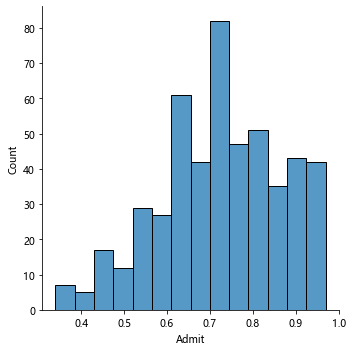

In [10]:
sns.displot(df["Admit"])

**Left skewed distribution**

** 4. Chances of admit seem to vary quite a bit. How much of this depends on research experience? Print the average chance of admit against research. (this can be done using a groupby) **

In [11]:
print(df["Admit"].groupby(df["Research"]).mean())

Research
0    0.634909
1    0.789964
Name: Admit, dtype: float64


**on average, having research experience helps admission by 0.15 point.**

** 5. Does the distribution of chances of admit change with university rating? Plot an histogram of chances of admit for each university rating. (Plot 5 histograms) **

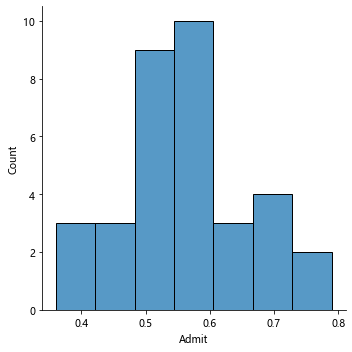

In [12]:
sns.displot(df[df["Rating"] == 1]["Admit"])

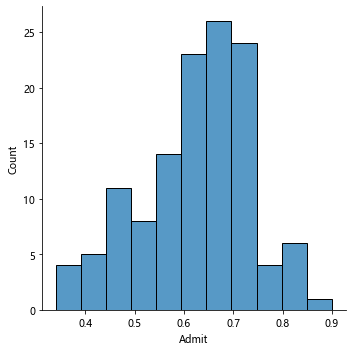

In [13]:
sns.displot(df[df["Rating"] == 2]["Admit"])

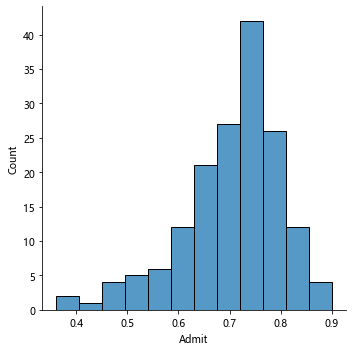

In [14]:
sns.displot(df[df["Rating"] == 3]["Admit"])

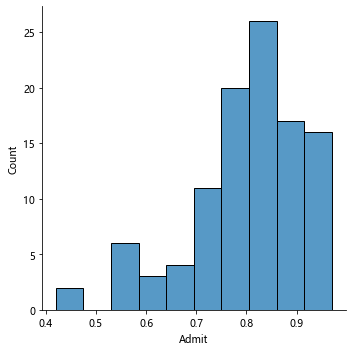

In [15]:
sns.displot(df[df["Rating"] == 4]["Admit"])

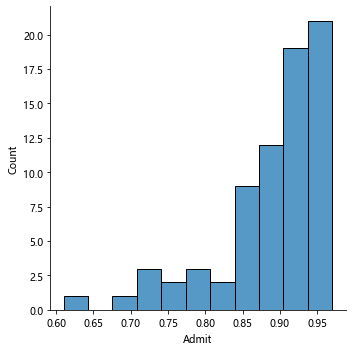

In [16]:
sns.displot(df[df["Rating"] == 5]["Admit"])

**Yes. From the histogram above, we can see the higher the rating, the more likely to be admitted**

** 6. Another way to look at the relationship between two variables is through scatter plots. Plot a scatter plot between TOEFL Score and chance of admit. **

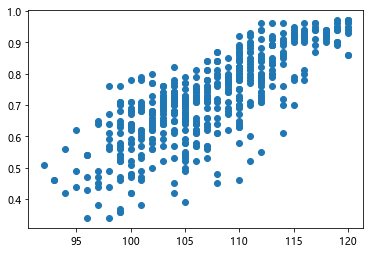

In [17]:
plt.scatter(df["TOEFL"], df["Admit"])

** 7. Boxplots are also useful to look at the relationship between a categorical variable and a numeric variable. Plot a boxplot of chance of admit grouped by "University Rating". (check out seaborn) **

<AxesSubplot:xlabel='Admit'>

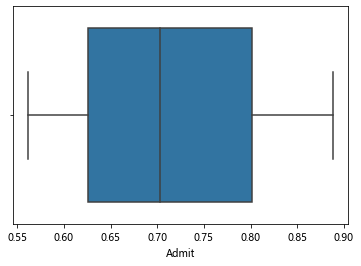

In [18]:
sns.boxplot(df["Admit"].groupby(df["Rating"]).mean())

** 8. Very often it is useful to quantify how strong is the relationship between different variables. For example, measures of correlation, such as Pearson's correlation coefficient, can show whether one numeric variable gives information on another numeric variable. Pandas allows us to compute the Pearson correlation coefficient between all pairs of columns in our dataframe. Display the correlations between all pairs of columns. **

In [19]:
df.corr()

,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
GRE,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


** 9. Heatmaps are a tool for conveniently visualizing correlation data. Plot these correlations as a seaborn heatmap. Which pairs of variables are most closely correlated? Which variable gives the most information on chance of admit? **

<AxesSubplot:>

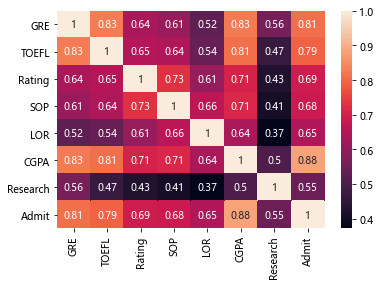

In [20]:
sns.heatmap(df.corr(), annot = True)

**Among features: TOEFL and GRE are most closely correlated; among features and target: CGPA and Admit are most closely correlated. CGPA gives the most info on chance of admit.**

** 10. Build a linear model to predict the chance of admit using the application info available. Generate predictions and compare predicted quality to the actual value in a scatter plot. ** Recommendation: try this before Class 2.  We will start on the details of predictive modeling in Class 2, so having tried it first will give you better context for the class.

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[["GRE", "TOEFL", "Rating", "SOP", "LOR", "CGPA", "Research"]], df["Admit"], train_size = 0.8, test_size = 0.2)

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

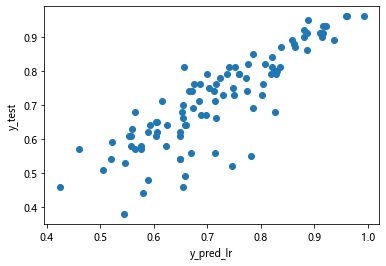

In [23]:
plt.xlabel('y_pred_lr')
plt.ylabel('y_test')
plt.scatter(y_pred_lr, y_test)
plt.show() 

** 11. (Extra Points, Optional) There are many different types of predictive models, each with their own plusses and minuses. For this task, repeat your modeling performed in step 8, but using a sklearn.ensemble.RandomForestRegressor. How does the scatter plot compare with the prior results? **

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

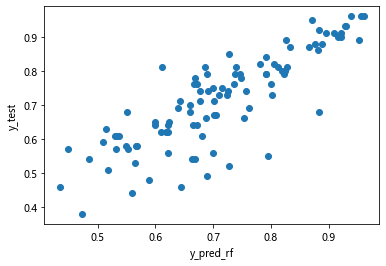

In [25]:
plt.xlabel('y_pred_rf')
plt.ylabel('y_test')
plt.scatter(y_pred_rf, y_test)
plt.show() 

In [26]:
from sklearn.metrics import r2_score
print("r2 of linear", r2_score(y_test, y_pred_lr))
print("r2 of random forest", r2_score(y_test, y_pred_rf))

r2 of linear 0.7323471981727872
r2 of random forest 0.6863870276623883


This scatter plot shows better predictions, but as we saw in the previous class, the model could be overfitting.

**try to solve overfitting a bit**

In [27]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {"max_depth": range(1,30,2),
              "max_features": range(1,11,2),
              "min_samples_split": range(1,201,20),
              "min_samples_leaf": range(1,20,2),
              "n_estimators": range(1,101,10),
             }

random_search = RandomizedSearchCV(rf, param_distributions = param_dist,
                                   n_iter = 100, scoring = "r2", verbose = 5)

random_search.fit(X_train, y_train)
print(random_search.best_estimator_)
best_clf = random_search.best_estimator_
y_pred_rf_opt = best_clf.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=21, min_samples_split=81, min_samples_leaf=11, max_features=3, max_depth=9 
[CV]  n_estimators=21, min_samples_split=81, min_samples_leaf=11, max_features=3, max_depth=9, score=0.787, total=   0.0s
[CV] n_estimators=21, min_samples_split=81, min_samples_leaf=11, max_features=3, max_depth=9 
[CV]  n_estimators=21, min_samples_split=81, min_samples_leaf=11, max_features=3, max_depth=9, score=0.753, total=   0.0s
[CV] n_estimators=21, min_samples_split=81, min_samples_leaf=11, max_features=3, max_depth=9 
[CV]  n_estimators=21, min_samples_split=81, min_samples_leaf=11, max_features=3, max_depth=9, score=0.775, total=   0.0s
[CV] n_estimators=21, min_samples_split=81, min_samples_leaf=11, max_features=3, max_depth=9 
[CV]  n_estimators=21, min_samples_split=81, min_samples_leaf=11, max_features=3, max_depth=9, score=0.765, total=   0.0s
[CV] n_estimators=21, min_samples_split=81, min_samples_leaf=11, max_feat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=1, min_samples_split=121, min_samples_leaf=5, max_features=7, max_depth=11, score=0.606, total=   0.0s
[CV] n_estimators=51, min_samples_split=1, min_samples_leaf=11, max_features=9, max_depth=7 
[CV]  n_estimators=51, min_samples_split=1, min_samples_leaf=11, max_features=9, max_depth=7, score=nan, total=   0.0s
[CV] n_estimators=51, min_samples_split=1, min_samples_leaf=11, max_features=9, max_depth=7 
[CV]  n_estimators=51, min_samples_split=1, min_samples_leaf=11, max_features=9, max_depth=7, score=nan, total=   0.0s
[CV] n_estimators=51, min_samples_split=1, min_samples_leaf=11, max_features=9, max_depth=7 
[CV]  n_estimators=51, min_samples_split=1, min_samples_leaf=11, max_features=9, max_depth=7, score=nan, total=   0.0s
[CV] n_estimators=51, min_samples_split=1, min_samples_leaf=11, max_features=9, max_depth=7 
[CV]  n_estimators=51, min_samples_split=1, min_samples_leaf=11, max_features=9, max_depth=7, score=nan, total=   0.0s
[CV] n_estimators=51, min_samp

[CV]  n_estimators=21, min_samples_split=161, min_samples_leaf=19, max_features=3, max_depth=15, score=0.602, total=   0.0s
[CV] n_estimators=21, min_samples_split=161, min_samples_leaf=19, max_features=3, max_depth=15 
[CV]  n_estimators=21, min_samples_split=161, min_samples_leaf=19, max_features=3, max_depth=15, score=0.644, total=   0.0s
[CV] n_estimators=21, min_samples_split=161, min_samples_leaf=19, max_features=3, max_depth=15 
[CV]  n_estimators=21, min_samples_split=161, min_samples_leaf=19, max_features=3, max_depth=15, score=0.584, total=   0.0s
[CV] n_estimators=31, min_samples_split=61, min_samples_leaf=19, max_features=9, max_depth=29 
[CV]  n_estimators=31, min_samples_split=61, min_samples_leaf=19, max_features=9, max_depth=29, score=nan, total=   0.0s
[CV] n_estimators=31, min_samples_split=61, min_samples_leaf=19, max_features=9, max_depth=29 
[CV]  n_estimators=31, min_samples_split=61, min_samples_leaf=19, max_features=9, max_depth=29, score=nan, total=   0.0s
[CV]

[CV]  n_estimators=1, min_samples_split=141, min_samples_leaf=3, max_features=3, max_depth=7, score=0.449, total=   0.0s
[CV] n_estimators=1, min_samples_split=141, min_samples_leaf=3, max_features=3, max_depth=7 
[CV]  n_estimators=1, min_samples_split=141, min_samples_leaf=3, max_features=3, max_depth=7, score=0.550, total=   0.0s
[CV] n_estimators=1, min_samples_split=141, min_samples_leaf=3, max_features=3, max_depth=7 
[CV]  n_estimators=1, min_samples_split=141, min_samples_leaf=3, max_features=3, max_depth=7, score=0.542, total=   0.0s
[CV] n_estimators=1, min_samples_split=141, min_samples_leaf=3, max_features=3, max_depth=7 
[CV]  n_estimators=1, min_samples_split=141, min_samples_leaf=3, max_features=3, max_depth=7, score=0.376, total=   0.0s
[CV] n_estimators=1, min_samples_split=141, min_samples_leaf=3, max_features=3, max_depth=7 
[CV]  n_estimators=1, min_samples_split=141, min_samples_leaf=3, max_features=3, max_depth=7, score=0.457, total=   0.0s
[CV] n_estimators=31, m

[CV]  n_estimators=21, min_samples_split=121, min_samples_leaf=9, max_features=3, max_depth=27, score=0.631, total=   0.0s
[CV] n_estimators=21, min_samples_split=121, min_samples_leaf=9, max_features=3, max_depth=27 
[CV]  n_estimators=21, min_samples_split=121, min_samples_leaf=9, max_features=3, max_depth=27, score=0.641, total=   0.0s
[CV] n_estimators=21, min_samples_split=121, min_samples_leaf=9, max_features=3, max_depth=27 
[CV]  n_estimators=21, min_samples_split=121, min_samples_leaf=9, max_features=3, max_depth=27, score=0.690, total=   0.0s
[CV] n_estimators=21, min_samples_split=121, min_samples_leaf=9, max_features=3, max_depth=27 
[CV]  n_estimators=21, min_samples_split=121, min_samples_leaf=9, max_features=3, max_depth=27, score=0.665, total=   0.0s
[CV] n_estimators=61, min_samples_split=1, min_samples_leaf=5, max_features=9, max_depth=19 
[CV]  n_estimators=61, min_samples_split=1, min_samples_leaf=5, max_features=9, max_depth=19, score=nan, total=   0.0s
[CV] n_esti

[CV]  n_estimators=71, min_samples_split=161, min_samples_leaf=5, max_features=3, max_depth=15, score=0.665, total=   0.1s
[CV] n_estimators=71, min_samples_split=161, min_samples_leaf=5, max_features=3, max_depth=15 
[CV]  n_estimators=71, min_samples_split=161, min_samples_leaf=5, max_features=3, max_depth=15, score=0.585, total=   0.1s
[CV] n_estimators=71, min_samples_split=161, min_samples_leaf=5, max_features=3, max_depth=15 
[CV]  n_estimators=71, min_samples_split=161, min_samples_leaf=5, max_features=3, max_depth=15, score=0.596, total=   0.1s
[CV] n_estimators=71, min_samples_split=161, min_samples_leaf=5, max_features=3, max_depth=15 
[CV]  n_estimators=71, min_samples_split=161, min_samples_leaf=5, max_features=3, max_depth=15, score=0.658, total=   0.1s
[CV] n_estimators=71, min_samples_split=161, min_samples_leaf=5, max_features=3, max_depth=15 
[CV]  n_estimators=71, min_samples_split=161, min_samples_leaf=5, max_features=3, max_depth=15, score=0.580, total=   0.1s
[CV] 

[CV]  n_estimators=61, min_samples_split=181, min_samples_leaf=1, max_features=7, max_depth=3, score=0.642, total=   0.1s
[CV] n_estimators=61, min_samples_split=181, min_samples_leaf=1, max_features=7, max_depth=3 
[CV]  n_estimators=61, min_samples_split=181, min_samples_leaf=1, max_features=7, max_depth=3, score=0.532, total=   0.1s
[CV] n_estimators=11, min_samples_split=21, min_samples_leaf=3, max_features=5, max_depth=11 
[CV]  n_estimators=11, min_samples_split=21, min_samples_leaf=3, max_features=5, max_depth=11, score=0.821, total=   0.0s
[CV] n_estimators=11, min_samples_split=21, min_samples_leaf=3, max_features=5, max_depth=11 
[CV]  n_estimators=11, min_samples_split=21, min_samples_leaf=3, max_features=5, max_depth=11, score=0.808, total=   0.0s
[CV] n_estimators=11, min_samples_split=21, min_samples_leaf=3, max_features=5, max_depth=11 
[CV]  n_estimators=11, min_samples_split=21, min_samples_leaf=3, max_features=5, max_depth=11, score=0.830, total=   0.0s
[CV] n_estimat

[CV]  n_estimators=21, min_samples_split=141, min_samples_leaf=5, max_features=7, max_depth=19, score=0.537, total=   0.0s
[CV] n_estimators=71, min_samples_split=81, min_samples_leaf=1, max_features=1, max_depth=7 
[CV]  n_estimators=71, min_samples_split=81, min_samples_leaf=1, max_features=1, max_depth=7, score=0.740, total=   0.1s
[CV] n_estimators=71, min_samples_split=81, min_samples_leaf=1, max_features=1, max_depth=7 
[CV]  n_estimators=71, min_samples_split=81, min_samples_leaf=1, max_features=1, max_depth=7, score=0.683, total=   0.1s
[CV] n_estimators=71, min_samples_split=81, min_samples_leaf=1, max_features=1, max_depth=7 
[CV]  n_estimators=71, min_samples_split=81, min_samples_leaf=1, max_features=1, max_depth=7, score=0.690, total=   0.1s
[CV] n_estimators=71, min_samples_split=81, min_samples_leaf=1, max_features=1, max_depth=7 
[CV]  n_estimators=71, min_samples_split=81, min_samples_leaf=1, max_features=1, max_depth=7, score=0.752, total=   0.1s
[CV] n_estimators=71,

[CV]  n_estimators=31, min_samples_split=161, min_samples_leaf=7, max_features=9, max_depth=7, score=nan, total=   0.0s
[CV] n_estimators=51, min_samples_split=181, min_samples_leaf=5, max_features=9, max_depth=21 
[CV]  n_estimators=51, min_samples_split=181, min_samples_leaf=5, max_features=9, max_depth=21, score=nan, total=   0.0s
[CV] n_estimators=51, min_samples_split=181, min_samples_leaf=5, max_features=9, max_depth=21 
[CV]  n_estimators=51, min_samples_split=181, min_samples_leaf=5, max_features=9, max_depth=21, score=nan, total=   0.0s
[CV] n_estimators=51, min_samples_split=181, min_samples_leaf=5, max_features=9, max_depth=21 
[CV]  n_estimators=51, min_samples_split=181, min_samples_leaf=5, max_features=9, max_depth=21, score=nan, total=   0.0s
[CV] n_estimators=51, min_samples_split=181, min_samples_leaf=5, max_features=9, max_depth=21 
[CV]  n_estimators=51, min_samples_split=181, min_samples_leaf=5, max_features=9, max_depth=21, score=nan, total=   0.0s
[CV] n_estimator

[CV]  n_estimators=11, min_samples_split=21, min_samples_leaf=13, max_features=1, max_depth=3, score=0.757, total=   0.0s
[CV] n_estimators=91, min_samples_split=161, min_samples_leaf=19, max_features=9, max_depth=7 
[CV]  n_estimators=91, min_samples_split=161, min_samples_leaf=19, max_features=9, max_depth=7, score=nan, total=   0.0s
[CV] n_estimators=91, min_samples_split=161, min_samples_leaf=19, max_features=9, max_depth=7 
[CV]  n_estimators=91, min_samples_split=161, min_samples_leaf=19, max_features=9, max_depth=7, score=nan, total=   0.0s
[CV] n_estimators=91, min_samples_split=161, min_samples_leaf=19, max_features=9, max_depth=7 
[CV]  n_estimators=91, min_samples_split=161, min_samples_leaf=19, max_features=9, max_depth=7, score=nan, total=   0.0s
[CV] n_estimators=91, min_samples_split=161, min_samples_leaf=19, max_features=9, max_depth=7 
[CV]  n_estimators=91, min_samples_split=161, min_samples_leaf=19, max_features=9, max_depth=7, score=nan, total=   0.0s
[CV] n_estimat

[CV]  n_estimators=61, min_samples_split=161, min_samples_leaf=9, max_features=3, max_depth=1, score=0.593, total=   0.1s
[CV] n_estimators=11, min_samples_split=101, min_samples_leaf=17, max_features=3, max_depth=23 
[CV]  n_estimators=11, min_samples_split=101, min_samples_leaf=17, max_features=3, max_depth=23, score=0.704, total=   0.0s
[CV] n_estimators=11, min_samples_split=101, min_samples_leaf=17, max_features=3, max_depth=23 
[CV]  n_estimators=11, min_samples_split=101, min_samples_leaf=17, max_features=3, max_depth=23, score=0.685, total=   0.0s
[CV] n_estimators=11, min_samples_split=101, min_samples_leaf=17, max_features=3, max_depth=23 
[CV]  n_estimators=11, min_samples_split=101, min_samples_leaf=17, max_features=3, max_depth=23, score=0.736, total=   0.0s
[CV] n_estimators=11, min_samples_split=101, min_samples_leaf=17, max_features=3, max_depth=23 
[CV]  n_estimators=11, min_samples_split=101, min_samples_leaf=17, max_features=3, max_depth=23, score=0.665, total=   0.0

[CV]  n_estimators=11, min_samples_split=81, min_samples_leaf=5, max_features=1, max_depth=19, score=0.726, total=   0.0s
[CV] n_estimators=11, min_samples_split=81, min_samples_leaf=5, max_features=1, max_depth=19 
[CV]  n_estimators=11, min_samples_split=81, min_samples_leaf=5, max_features=1, max_depth=19, score=0.697, total=   0.0s
[CV] n_estimators=11, min_samples_split=81, min_samples_leaf=5, max_features=1, max_depth=19 
[CV]  n_estimators=11, min_samples_split=81, min_samples_leaf=5, max_features=1, max_depth=19, score=0.730, total=   0.0s
[CV] n_estimators=11, min_samples_split=81, min_samples_leaf=5, max_features=1, max_depth=19 
[CV]  n_estimators=11, min_samples_split=81, min_samples_leaf=5, max_features=1, max_depth=19, score=0.740, total=   0.0s
[CV] n_estimators=31, min_samples_split=121, min_samples_leaf=13, max_features=1, max_depth=15 
[CV]  n_estimators=31, min_samples_split=121, min_samples_leaf=13, max_features=1, max_depth=15, score=0.660, total=   0.0s
[CV] n_est

[CV]  n_estimators=81, min_samples_split=21, min_samples_leaf=13, max_features=9, max_depth=13, score=nan, total=   0.0s
[CV] n_estimators=21, min_samples_split=81, min_samples_leaf=19, max_features=1, max_depth=17 
[CV]  n_estimators=21, min_samples_split=81, min_samples_leaf=19, max_features=1, max_depth=17, score=0.742, total=   0.0s
[CV] n_estimators=21, min_samples_split=81, min_samples_leaf=19, max_features=1, max_depth=17 
[CV]  n_estimators=21, min_samples_split=81, min_samples_leaf=19, max_features=1, max_depth=17, score=0.654, total=   0.0s
[CV] n_estimators=21, min_samples_split=81, min_samples_leaf=19, max_features=1, max_depth=17 
[CV]  n_estimators=21, min_samples_split=81, min_samples_leaf=19, max_features=1, max_depth=17, score=0.704, total=   0.0s
[CV] n_estimators=21, min_samples_split=81, min_samples_leaf=19, max_features=1, max_depth=17 
[CV]  n_estimators=21, min_samples_split=81, min_samples_leaf=19, max_features=1, max_depth=17, score=0.739, total=   0.0s
[CV] n_

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   22.4s finished


In [28]:
print("r2 of random forest after optimization", r2_score(y_test, y_pred_rf_opt))

r2 of random forest after optimization 0.739753420681714


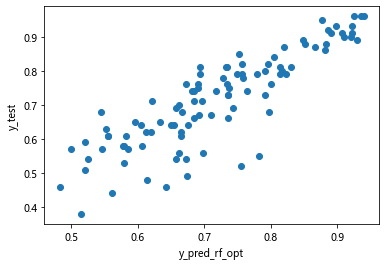

In [29]:
plt.xlabel('y_pred_rf_opt')
plt.ylabel('y_test')
plt.scatter(y_pred_rf_opt, y_test)
plt.show() 